#Import library

* **numpy.polynomial.polynomial**: provides a number of objects (mostly functions) useful for dealing with polynomials.
* **datetime**: create date and datetime objects, loop through a range of dates, parse and format date strings, and more.
* **matplotlib.pyplot**: used to create 2D graphs and plots by using python scripts.
* **pandas**: analyze data.
*	numpy: working with arrays.
*	**r2_score**: evaluate the performance of a linear regression model.
*	**LinearRegression**: used to call Linear Regression model.
*	**mean_squared_error**: measures the average squared difference between the estimated values and true value.
*	**seaborn**: making statistical graphics.
*	**matplotlib.pyplot**: creating static, animated, and interactive visualizations.


In [ ]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Import data 

In [30]:
df=pd.read_csv(r"/content/BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805,16099.799805,13454300160
1,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
2,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
3,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160
4,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808
...,...,...,...,...,...,...,...
1822,2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050
1823,2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213
1824,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
1825,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938


#Convert to a datetime data type

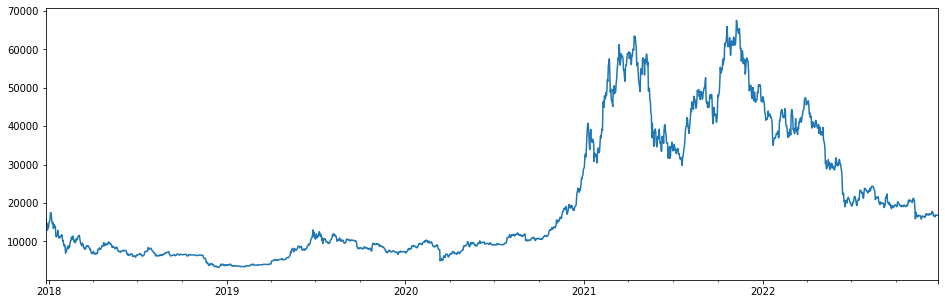

In [31]:
df.index = df['Date']
# Convert the 'date' column to a datetime data type
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df['Time'] = np.arange(len(df.index))
df['Close'].plot(figsize=(16,5))

In [32]:
df2 = df.copy()
#plot the linear regression and the close price

#create the new column called Numbers

* Create the new column called Numbers. Then, we store the “Numbers” to X (independent variable) and ClosePrice to Y (dependent variable).
* Using LinearRegression to fix X and Y.
* Find Intercept (β0).
* Find Slope (β1).


In [33]:
df2['Numbers'] = list(range(0, len(df2)))
#store the 'Numbers' to X and ClosePrice to Y
X = np.array(df2[['Numbers']])
Y = df2['Close'].values
linearmodel = LinearRegression().fit(X,Y)
print('Intercept' , linearmodel.intercept_)
print('Slope' , linearmodel.coef_)
df2['Numbers']

Intercept 996.1029631121164
Slope [21.17663377]


2017-12-26       0
2017-12-27       1
2017-12-28       2
2017-12-29       3
2017-12-30       4
              ... 
2022-12-22    1822
2022-12-23    1823
2022-12-24    1824
2022-12-25    1825
2022-12-26    1826
Name: Numbers, Length: 1827, dtype: int64

#Visualization

* Substitute the result of Intercept and Slope into the formula: **y_pred = linearmodel.coef_* X + linearmodel.intercept_** to find Close Price of BTC-USD.
* Visualize predict Close Price of BTC-USD.


Text(0.5, 1.0, 'Close Price Of BTC-USD')

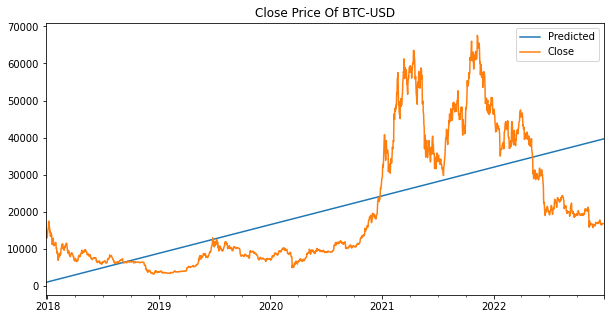

In [34]:
#prepare the data for visualization
#store the predicted prices from the model and store them into y_pred
#y = ax + b 
y_pred = linearmodel.coef_* X + linearmodel.intercept_
#store the y_pred into new colums call Predicted
df2['Predicted'] =  y_pred
#plot the data
df2['Predicted'].plot(figsize=(10,5),legend = True)
df2['Close'].plot(figsize=(10,5),legend = True)
plt.title('Close Price Of BTC-USD')

#Model assessment

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(df2['Close'], df2['Predicted'])
mape = mean_absolute_percentage_error(df2['Close'], df2['Predicted'])
mse = mean_squared_error(df2['Close'], df2['Predicted'])
rmse = np.sqrt(mse)
print("MAE: ",mae)
print("MAPE: ", mape*100)
print("RMSE: ", rmse)

MAE:  10187.171518211508
MAPE:  67.59772739279887
RMSE:  12788.1740810164
